# 11주차 과제 - Git 작업

- **작업 내용을 확인**하기 위해 만든 ipynb 파일입니다.
- 작업 코드는 [코드_공유.py], [성능확인.ipynb] 파일에 정리 바랍니다.
- 이 ipynb 파일에는 아래 내용을 포함합니다.
    - 데이터 세팅 코드
    - A_brach에서 이루어질 작업
    - B_branch에서 이루어질 작업
    - B_branch에서 작업을 하는 동안 Admin_branch에서 이루어질 작업
    - Tester_branch에서 이루어질 작업

---
- **데이터 세팅 코드**

- 데이터 세팅은 아래 코드를 사용하여 진행합니다.

In [3]:
# 라이브러리 및 데이터 불러오기

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

wine = load_wine()

In [5]:
# feature로 사용할 데이터에서는 'target' 컬럼을 drop합니다.
# target은 'target' 컬럼만을 대상으로 합니다.
# X, y 데이터를 test size는 0.2, random_state 값은 42로 하여 train 데이터와 test 데이터로 분할합니다.

# feature 데이터와 target 데이터 생성
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# train-test 분할 (test size 0.2, random_state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [7]:
# 데이터 분할 결과 확인
print("="*50)
print("Feature 데이터 분할 결과:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("\nTarget 데이터 분할 결과:")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\n" + "="*50)
print("X_train 처음 5행 샘플:")
print(X_train.head())

print("\ny_train 처음 5개 값:")
print(y_train.head())

Feature 데이터 분할 결과:
X_train shape: (142, 13)
X_test shape: (36, 13)

Target 데이터 분할 결과:
y_train shape: (142,)
y_test shape: (36,)

X_train 처음 5행 샘플:
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
158    14.34        1.68  2.70               25.0       98.0           2.80   
137    12.53        5.51  2.64               25.0       96.0           1.79   
98     12.37        1.07  2.10               18.5       88.0           3.52   
159    13.48        1.67  2.64               22.5       89.0           2.60   
38     13.07        1.50  2.10               15.5       98.0           2.40   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
158        1.31                  0.53             2.70            13.00  0.57   
137        0.60                  0.63             1.10             5.00  0.82   
98         3.75                  0.24             1.95             4.50  1.04   
159        1.10                  0.52             2.29

[최적 하이퍼파라미터]
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

[최고 정확도]
0.9224

[테스트 세트 정확도]
0.9444


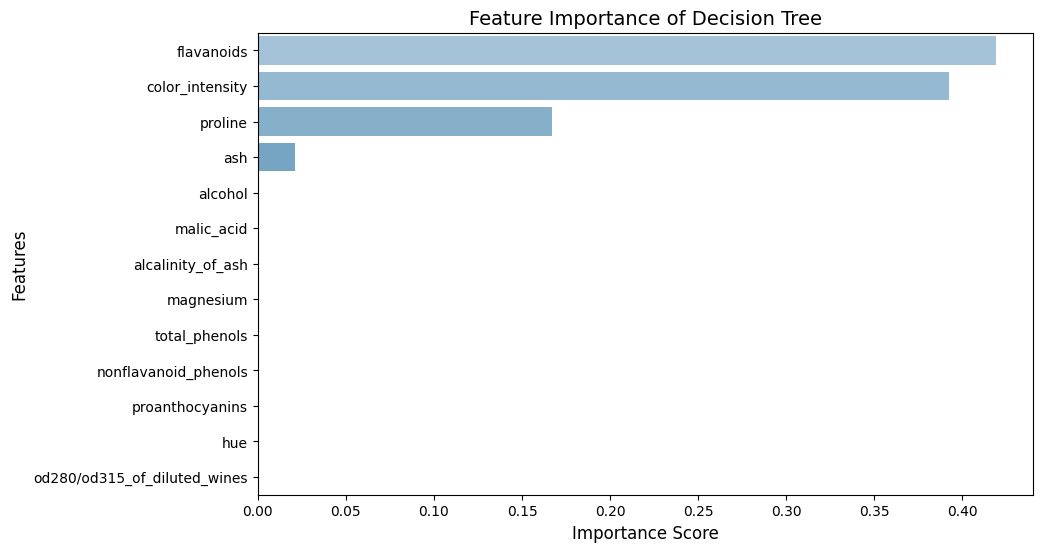

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Decision Tree 모델 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# 2. 하이퍼파라미터 그리드 설정
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. GridSearchCV 수행 (cv=5, scoring='accuracy')
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy')
grid_cv.fit(X_train, y_train)

# 4. 최적 파라미터 및 최고 정확도 출력
print("="*50)
print("[최적 하이퍼파라미터]")
print(grid_cv.best_params_)
print("\n[최고 정확도]")
print(f"{grid_cv.best_score_:.4f}")

# 5. 최적 모델로 테스트 세트 평가
best_dt = grid_cv.best_estimator_
test_acc = best_dt.score(X_test, y_test)
print("\n[테스트 세트 정확도]")
print(f"{test_acc:.4f}")

# 6. Feature Importance 시각화
plt.figure(figsize=(10, 6))
importance = pd.Series(best_dt.feature_importances_, index=X_train.columns)
importance = importance.sort_values(ascending=False)
sns.barplot(x=importance.values, y=importance.index, palette='Blues_d')

plt.title('Feature Importance of Decision Tree', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

---
- **A_brach에서 이루어질 작업**

- A 작업자는 **DecisionTreeClassifier**을 사용한 모델링을 수행합니다.
    - 데이터는 위에서 작업한 데이터를 사용합니다.
    - GridSearch를 활용해 하이퍼파라미터 튜닝을 수행합니다.
    - cv=5을 적용하여 최적의 하이퍼파라미터 조합을 찾습니다.
    - 하이퍼 파라미터 튜닝 과정에서 모델 평가 기준은 **Accuracy**로 합니다.
    - 최적의 하이퍼파라미터 조합을 찾은 후, **Feature Importance**를 시각화하여 모델이 어떤 변수를 중요하게 사용했는지 확인합니다.

- 하이퍼파라미터 후보는 아래와 같습니다.
    - criterion: ['gini', 'entropy']
    - max_depth: [2, 5]
    - min_samples_split: [2,10]
    - min_samples_leaf: [1, 2, 4]

---
- **B_branch에서 이루어질 작업**

- A 작업자와 병렬로 작업을 수행합니다.  
 ※ A 작업자의 작업내용을 보지 못하는 상태입니다.

- B 작업자는 **XGBClassifier**을 사용한 모델링을 수행합니다.
    - 데이터는 위에서 작업한 데이터를 사용합니다.
    - GridSearch를 활용해 하이퍼파라미터 튜닝을 수행합니다.
    - cv=5을 적용하여 최적의 하이퍼파라미터 조합을 찾습니다.
    - 모델의 성능 평가는 **Accuracy**를 기준으로 판단합니다.

 - **하이퍼파라미터 후보**  
    - max_depth: [3, 5, 7, 9, 15] 
    - learning_rate: [0.1, 0.01, 0.001]
    - n_estimators: [50, 100, 200, 300]
    - 최적의 하이퍼파라미터 조합을 찾은 후, **Feature Importance**를 시각화하여 모델이 어떤 변수를 중요하게 사용했는지 확인합니다.

---
- **B_branch에서 작업을 하는 동안 Admin_branch에서 이루어질 작업**

- DecisionTreeClassifier 모델에 대한 Admin_branch 작업
- Admin_branch에서 DecisionTreeClassifier에 대한 추가 작업을 수행합니다.
- A 작업자 작업수행 이후, B 작업자가 작업을 수행하는 동안 Admin_Branch에서 A 작업자 DecisionTreeClassifier 모델의 하이퍼 파라미터값을 조정합니다.
- "최대 깊이" 하이퍼 파라미터 후보 리스트를 [2,3,4,5], "노드 분할 최소 샘플 수' 후보 리스트를 [2, 5, 10]으로 변경합니다.

---
- **Tester_brach에서 이루어질 작업**

- 위에서 만든 DT, XGB 모델에 대한 성능 비교 테스트를 수행합니다.
- 출력 결과는 Test_Result.ipynb 파일을 만들고 해당 파일에 기록합니다.